In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pm4py
import pm4py
import inflect
from datetime import datetime
import pandas as pd
!pip install -U ortools
import os

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=cc413e61ec44105b2196b3b8a6d2fbbae62c33f66c8bbbedbe22382998e12326
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


Reading OCEL datasets.

In [ ]:
ocel = pm4py.read_ocel2_json("./drive/MyDrive/order-management.json")
# ocel = pm4py.read_ocel2_json("./drive/MyDrive/datasets/ContainerLogistics.json")
# ocel = pm4py.read_ocel2_json("./drive/MyDrive/datasets/ocel2-p2p.json")
# ocel = pm4py.read_ocel2_xml("./drive/MyDrive/datasets/agc.xml")
print(ocel)
ocel.get_extended_table()

Object-Centric Event Log (number of events: 21008, number of objects: 10840, number of activities: 11, number of object types: 6, events-objects relationships: 147385)
Activities occurrences: Counter({'pick item': 7659, 'place order': 2000, 'confirm order': 2000, 'pay order': 2000, 'item out of stock': 1544, 'reorder item': 1544, 'create package': 1128, 'send package': 1128, 'package delivered': 1128, 'payment reminder': 566, 'failed delivery': 311})
Object types occurrences (number of objects): Counter({'items': 7659, 'orders': 2000, 'packages': 1128, 'products': 20, 'employees': 18, 'customers': 15})
Unique activities per object type: Counter({'items': 11, 'products': 11, 'employees': 8, 'orders': 4, 'packages': 4, 'customers': 2})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


,ocel:eid,ocel:timestamp,ocel:activity,ocel:type:customers,ocel:type:items,ocel:type:orders,ocel:type:products,ocel:type:employees,ocel:type:packages
0,place_o-990001,2023-04-03 10:08:18,place order,[AlpenTech Innovations AG],"[i-880003, i-880001, i-880002]",[o-990001],"[iPhone 11 Pro, Echo]",NaN,NaN
1,pick_i-880003,2023-04-03 11:21:49,pick item,NaN,[i-880003],NaN,[iPhone 11 Pro],[Leah Tacke genannt Unterberg],NaN
2,place_o-990002,2023-04-03 14:36:55,place order,[AlpenTech Innovations AG],"[i-880006, i-880004, i-880005]",[o-990002],"[Kindle Paperwhite, iPad mini, MacBook Pro]",NaN,NaN
3,place_o-990003,2023-04-03 21:31:23,place order,[Celtica Green Farms Oy],"[i-880010, i-880007, i-880012, i-880011, i-880...",[o-990003],"[iPhone 8, Fire Stick, Kindle Paperwhite, iPad...",NaN,NaN
4,pick_i-880001,2023-04-04 07:50:21,pick item,NaN,[i-880001],NaN,[Echo],[Leah Tacke genannt Unterberg],NaN
...,...,...,...,...,...,...,...,...,...
21003,deliver_p-661127,2024-05-28 10:49:37,package delivered,NaN,[i-887529],NaN,[iPhone X],[Yisong Zhang],[p-661127]
21004,create_p-661128,2024-05-31 23:00:00,create package,NaN,[i-887573],NaN,[Echo Dot],[Detlef Wetzeler],[p-661128]
21005,send_p-661128,2024-06-03 08:20:59,send package,NaN,[i-887573],NaN,[Echo Dot],[Viki Peeva],[p-661128]
21006,deliver_p-661128,2024-06-03 10:17:54,package delivered,NaN,[i-887573],NaN,[Echo Dot],[Viki Peeva],[p-661128]


Printing list of all objects and storing in array.

In [ ]:
objects = ocel.objects
all_obj = objects["ocel:type"].unique();
print(all_obj)

['orders' 'items' 'packages' 'customers' 'products' 'employees']


Filter corresponding to each object group and calculate relationships

In [ ]:
import itertools

obj_pairs = [
    [type1, type2]
    for type1, type2 in itertools.combinations(all_obj, 2)
]

for pair in obj_pairs:
  print(pair)

['orders', 'items']
['orders', 'packages']
['orders', 'customers']
['orders', 'products']
['orders', 'employees']
['items', 'packages']
['items', 'customers']
['items', 'products']
['items', 'employees']
['packages', 'customers']
['packages', 'products']
['packages', 'employees']
['customers', 'products']
['customers', 'employees']
['products', 'employees']


In [ ]:
# List of object types to include
object_types_to_keep = ["employees", "items"]

# Filter the OCEL dataset
filtered_ocel = pm4py.filtering.filter_ocel_object_types(ocel, object_types_to_keep)

# Print the filtered objects
print(filtered_ocel)

output_file_path = "filtered_ocel.jsonocel"

pm4py.write.write_ocel2_json(filtered_ocel, output_file_path)

Object-Centric Event Log (number of events: 21008, number of objects: 7677, number of activities: 11, number of object types: 2, events-objects relationships: 78427)
Activities occurrences: Counter({'pick item': 7659, 'place order': 2000, 'confirm order': 2000, 'pay order': 2000, 'item out of stock': 1544, 'reorder item': 1544, 'create package': 1128, 'send package': 1128, 'package delivered': 1128, 'payment reminder': 566, 'failed delivery': 311})
Object types occurrences (number of objects): Counter({'items': 7659, 'employees': 18})
Unique activities per object type: Counter({'items': 11, 'employees': 8})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
import json
p = inflect.engine()
relation = []
event_relation = []

with open(output_file_path, 'r') as file:
  data = json.load(file)

  relationship_count = 0

  for obj in data.get("objects", []):
    relationships = obj.get("relationships", [])
    relationship_count += len(relationships)

  event_relation_cnt = 0

  for event in data.get("events", []):
    num_A = sum(1 for r in event["relationships"] if r["qualifier"] == "shipped package")
    num_B = sum(1 for r in event["relationships"] if r["qualifier"] == "item")
    event_relation_cnt += num_A*num_B


  print(event_relation_cnt)

0


In [ ]:
import json
p = inflect.engine()
relation = []
event_relation = []

for obj_to_keep in obj_pairs:
  filtered_ocel = pm4py.filtering.filter_ocel_object_types(ocel,obj_to_keep)
  log = pm4py.write.write_ocel2_json(filtered_ocel,output_file_path)
  print(log)
  with open(output_file_path, 'r') as file:
    data = json.load(file)

  relationship_count = 0
  omap = {}

  for obj in data.get("objects", []):
    relationships = obj.get("relationships", [])
    relationship_count += len(relationships)
    id = obj.get("id")
    otype = obj.get("type")
    omap[id] = otype

  event_relation_cnt = 0

  for event in data.get("events", []):
    num_A = sum(1 for r in event["relationships"] if omap[r["objectId"]] == obj_to_keep[0])
    num_B = sum(1 for r in event["relationships"] if omap[r["objectId"]] == obj_to_keep[1])
    event_relation_cnt += num_A*num_B

  print(f"{obj_to_keep}, {relationship_count}, {event_relation_cnt}")
  relation.append(relationship_count)
  event_relation.append(event_relation_cnt)

print(relation)
print(event_relation)

/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['orders', 'items'], 7659, 25191


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['orders', 'packages'], 0, 0


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['orders', 'customers'], 2000, 4000


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['orders', 'products'], 0, 22974


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['orders', 'employees'], 0, 2000


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['items', 'packages'], 7659, 24997


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['items', 'customers'], 0, 15318


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['items', 'products'], 7659, 290105


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['items', 'employees'], 0, 50529


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['packages', 'customers'], 0, 0


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['packages', 'products'], 0, 20976


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['packages', 'employees'], 3384, 4745


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['customers', 'products'], 0, 13960


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['customers', 'employees'], 30, 2000


/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

None
['products', 'employees'], 0, 44682
[7659, 0, 2000, 0, 0, 7659, 0, 7659, 0, 0, 0, 3384, 0, 30, 0]
[25191, 0, 4000, 22974, 2000, 24997, 15318, 290105, 50529, 0, 20976, 4745, 13960, 2000, 44682]


Create a graph with the object pairs and relations.

In [ ]:
import networkx as nx

# Create a multigraph from obj_pairs, relation, and event_relation
def create_multigraph(obj_pairs, relation, event_relation):
    G = nx.MultiGraph()
    for i in range(len(obj_pairs)):
        v1, v2 = obj_pairs[i]
        weight1 = relation[i]
        weight2 = event_relation[i]

        # Only add edges with non-zero weight
        if weight1 > 0:
            G.add_edge(v1, v2, key='relation', weight=weight1)
        if weight2 > 0:
            G.add_edge(v1, v2, key='event_relation', weight=weight2)

    return G

# Print edges in table format
def print_edge_table(G):
    print(f"{'V1':<5} {'V2':<5} {'Relation Weight':<15} {'Event Relation Weight':<20}")
    print("-" * 50)
    edges = {}

    for u, v, key, data in G.edges(keys=True, data=True):
        if (u, v) not in edges:
            edges[(u, v)] = {'relation': '-', 'event_relation': '-'}
        edges[(u, v)][key] = f"{data['weight']:.2f}"

    for (u, v), weights in edges.items():
        print(f"{u:<5} {v:<5} {weights['relation']:<15} {weights['event_relation']:<20}")

# ===== FUNCTION CALLS =====

# Assuming obj_pairs, relation, and event_relation are defined
multigraph = create_multigraph(obj_pairs, relation, event_relation)
print_edge_table(multigraph)


V1    V2    Relation Weight Event Relation Weight
--------------------------------------------------
orders items 7659.00         25191.00            
orders customers 2000.00         4000.00             
orders products -               22974.00            
orders employees -               2000.00             
items packages 7659.00         24997.00            
items customers -               15318.00            
items products 7659.00         290105.00           
items employees -               50529.00            
customers products -               13960.00            
customers employees 30.00           2000.00             
products packages -               20976.00            
products employees -               44682.00            
employees packages 3384.00         4745.00             


Normalize Relation Weight and Event-Relation Weight to create a single graph.

In [ ]:
import networkx as nx
import numpy as np

# Normalize weights to range [0, 1]
def normalize_weights(weights):
    min_w = min(weights)
    max_w = max(weights)
    if max_w - min_w == 0:
        return [0 for _ in weights]
    return [(w - min_w) / (max_w - min_w) for w in weights]

# Convert multigraph to single graph using normalized and combined weights
def convert_to_single_graph(obj_pairs, relation, event_relation, alpha=0.5):
    # Normalize both sets of weights
    norm_relation = normalize_weights(relation)
    norm_event_relation = normalize_weights(event_relation)

    G = nx.Graph()
    for i in range(len(obj_pairs)):
        v1, v2 = obj_pairs[i]
        w1 = norm_relation[i]
        w2 = norm_event_relation[i]

        # Combine weights using a weighted sum
        combined_weight = alpha * w1 + (1 - alpha) * w2

        if combined_weight > 0:
            G.add_edge(v1, v2, weight=combined_weight, norm_relation=w1, norm_event_relation=w2)

    return G

# Print edges with normalized and combined weights
def print_combined_edge_table(G):
    print(f"{'V1':<5} {'V2':<5} {'Norm Relation':<15} {'Norm Event Relation':<20} {'Combined Weight':<15}")
    print("-" * 70)

    for u, v, data in G.edges(data=True):
        norm_relation = data.get('norm_relation', 0)
        norm_event_relation = data.get('norm_event_relation', 0)
        combined_weight = data.get('weight', 0)
        print(f"{u:<5} {v:<5} {norm_relation:.2f}          {norm_event_relation:.2f}                {combined_weight:.2f}")

# ===== FUNCTION CALLS =====

# Assuming obj_pairs, relation, and event_relation are defined
single_graph = convert_to_single_graph(obj_pairs, relation, event_relation, alpha=0.5)
print_combined_edge_table(single_graph)


V1    V2    Norm Relation   Norm Event Relation  Combined Weight
----------------------------------------------------------------------
orders items 1.00          0.09                0.54
orders customers 0.26          0.01                0.14
orders products 0.00          0.08                0.04
orders employees 0.00          0.01                0.00
items packages 1.00          0.09                0.54
items customers 0.00          0.05                0.03
items products 1.00          1.00                1.00
items employees 0.00          0.17                0.09
customers products 0.00          0.05                0.02
customers employees 0.00          0.01                0.01
products packages 0.00          0.07                0.04
products employees 0.00          0.15                0.08
employees packages 0.44          0.02                0.23


Plot the graph with normalized combined edges.

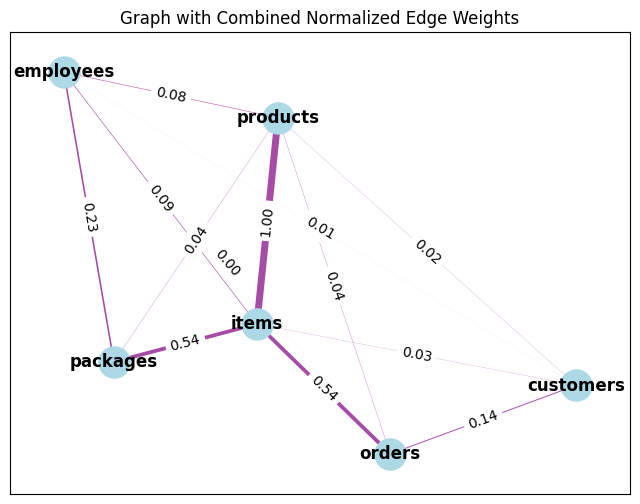

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Normalize weights to range [0, 1]
def normalize_weights(weights):
    min_w = min(weights)
    max_w = max(weights)
    if max_w - min_w == 0:
        return [0 for _ in weights]
    return [(w - min_w) / (max_w - min_w) for w in weights]

# Convert multigraph to single graph using normalized and combined weights
def convert_to_single_graph(obj_pairs, relation, event_relation, alpha=0.5):
    # Normalize both sets of weights
    norm_relation = normalize_weights(relation)
    norm_event_relation = normalize_weights(event_relation)

    G = nx.Graph()
    for i in range(len(obj_pairs)):
        v1, v2 = obj_pairs[i]
        w1 = norm_relation[i]
        w2 = norm_event_relation[i]

        # Combine weights using a weighted sum
        combined_weight = alpha * w1 + (1 - alpha) * w2

        if combined_weight > 0:
            G.add_edge(v1, v2, weight=combined_weight, norm_relation=w1, norm_event_relation=w2)

    return G

# Plot the graph with combined edges
def plot_combined_graph(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for better visualization

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with weights as thickness
    edges = G.edges(data=True)
    edge_widths = [data['weight'] * 5 for _, _, data in edges]  # Scale weights for better visibility
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, edge_color='purple')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')

    # Draw edge labels (show combined weights)
    edge_labels = {(u, v): f"{data['weight']:.2f}" for u, v, data in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Graph with Combined Normalized Edge Weights")
    plt.show()

# ===== FUNCTION CALLS =====

# Assuming obj_pairs, relation, and event_relation are defined
single_graph = convert_to_single_graph(obj_pairs, relation, event_relation, alpha=0.5)
plot_combined_graph(single_graph)
